In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import anderson

In [2]:
df = pd.read_csv('lemonade.csv', index_col='Date', parse_dates=True)

In [3]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.589041
std,18.085892,0.273890,13.786445,0.0,29.979680
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


In [4]:
df.Temperature.median()

61.1

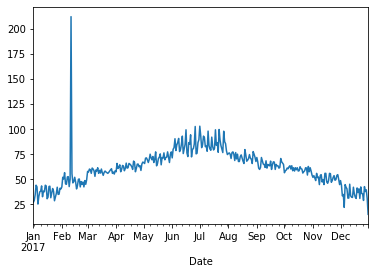

In [5]:
df.Temperature.plot()

In [6]:
df.Rainfall.median()

0.74

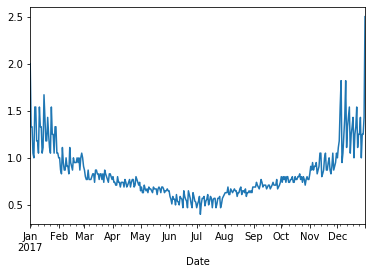

In [7]:
df.Rainfall.plot()

In [8]:
df.Flyers.median()

39.0

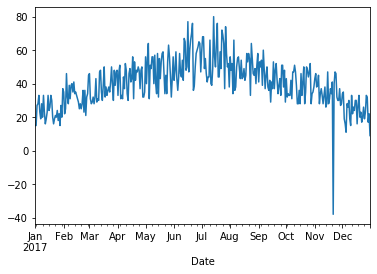

In [9]:
df.Flyers.plot()

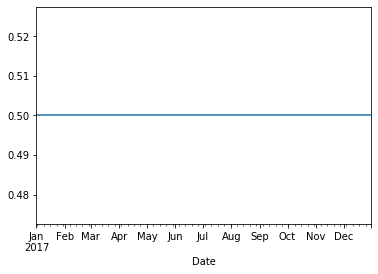

In [10]:
df.Price.plot()

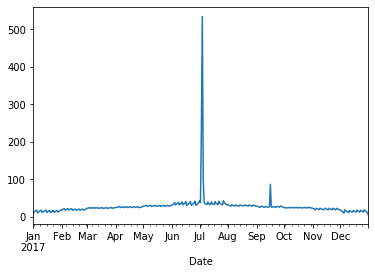

In [11]:
df.Sales.plot()

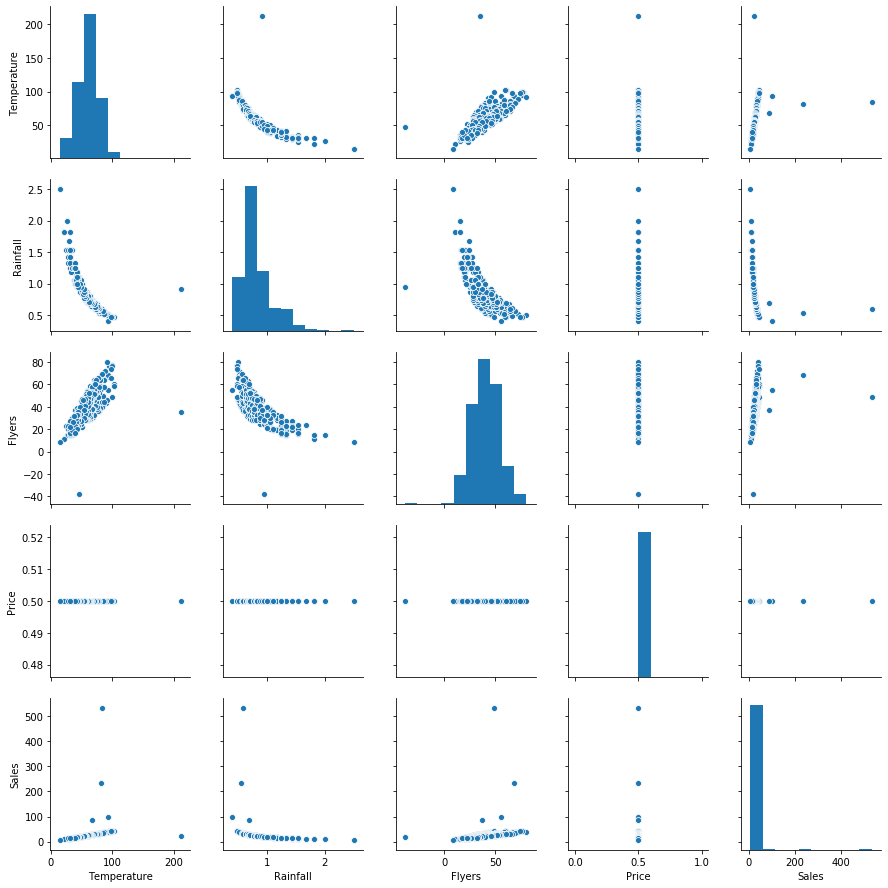

In [12]:
sns.pairplot(df)

In [13]:
lowerq = df.quantile(.25)
lowerq

Temperature    49.70
Rainfall        0.65
Flyers         31.00
Price           0.50
Sales          20.00
Name: 0.25, dtype: float64

In [14]:
upperq = df.quantile(.75)
upperq

Temperature    71.70
Rainfall        0.91
Flyers         49.00
Price           0.50
Sales          30.00
Name: 0.75, dtype: float64

In [15]:
iqr = upperq - lowerq
iqr

Temperature    22.00
Rainfall        0.26
Flyers         18.00
Price           0.00
Sales          10.00
dtype: float64

In [16]:
upper_limit = upperq + 1.5 * iqr
lower_limit = lowerq - 1.5 * iqr

In [17]:
print(upper_limit)
print(lower_limit)

Temperature    104.7
Rainfall         1.3
Flyers          76.0
Price            0.5
Sales           45.0
dtype: float64
Temperature    16.70
Rainfall        0.26
Flyers          4.00
Price           0.50
Sales           5.00
dtype: float64


In [18]:
up_out_T = df.Temperature[df.Temperature > upper_limit.Temperature]
up_out_T

Date
2017-02-11    212.0
Name: Temperature, dtype: float64

In [19]:
low_out_T = df.Temperature[df.Temperature < lower_limit.Temperature]
low_out_T

Date
2017-12-31    15.1
Name: Temperature, dtype: float64

In [20]:
up_out_R = df.Rainfall[df.Rainfall > upper_limit.Rainfall]
up_out_R

Date
2017-01-01    2.00
2017-01-02    1.33
2017-01-03    1.33
2017-01-06    1.54
2017-01-07    1.54
2017-01-11    1.54
2017-01-12    1.33
2017-01-13    1.33
2017-01-16    1.67
2017-01-17    1.43
2017-01-20    1.43
2017-01-24    1.54
2017-01-28    1.33
2017-01-29    1.33
2017-12-04    1.54
2017-12-05    1.82
2017-12-09    1.43
2017-12-10    1.82
2017-12-12    1.33
2017-12-13    1.43
2017-12-14    1.54
2017-12-17    1.33
2017-12-18    1.43
2017-12-21    1.33
2017-12-22    1.54
2017-12-26    1.43
2017-12-30    1.43
2017-12-31    2.50
Name: Rainfall, dtype: float64

In [21]:
low_out_R = df.Rainfall[df.Rainfall < lower_limit.Rainfall]
low_out_R

Series([], Name: Rainfall, dtype: float64)

In [22]:
up_out_F = df.Flyers[df.Flyers > upper_limit.Flyers] #no outliers
up_out_F

Date
2017-06-16    77
2017-07-14    80
Name: Flyers, dtype: int64

In [23]:
low_out_F = df.Flyers[df.Flyers < lower_limit.Flyers]
low_out_F

Date
2017-11-21   -38
Name: Flyers, dtype: int64

In [24]:
up_out_S = df.Sales[df.Sales > upper_limit.Sales]
up_out_S

Date
2017-07-03    235
2017-07-04    534
2017-07-05     99
2017-09-16     87
Name: Sales, dtype: int64

In [25]:
low_out_S = df.Sales[df.Sales < lower_limit.Sales] #no outliers
low_out_S

Series([], Name: Sales, dtype: int64)

In [26]:
upper_limit2 = upperq + 3 * iqr
lower_limit2 = lowerq - 3 * iqr

In [27]:
up_out_T = df.Temperature[df.Temperature > upper_limit2.Temperature]
up_out_T

Date
2017-02-11    212.0
Name: Temperature, dtype: float64

In [28]:
low_out_T = df.Temperature[df.Temperature < lower_limit2.Temperature]
low_out_T

Series([], Name: Temperature, dtype: float64)

In [29]:
up_out_R = df.Rainfall[df.Rainfall > upper_limit2.Rainfall]
up_out_R

Date
2017-01-01    2.00
2017-12-05    1.82
2017-12-10    1.82
2017-12-31    2.50
Name: Rainfall, dtype: float64

In [30]:
low_out_R = df.Rainfall[df.Rainfall < lower_limit2.Rainfall]
low_out_R

Series([], Name: Rainfall, dtype: float64)

In [31]:
up_out_F = df.Flyers[df.Flyers > upper_limit2.Flyers] #no outliers
up_out_F

Series([], Name: Flyers, dtype: int64)

In [32]:
low_out_F = df.Flyers[df.Flyers < lower_limit2.Flyers]
low_out_F

Date
2017-11-21   -38
Name: Flyers, dtype: int64

In [33]:
up_out_S = df.Sales[df.Sales > upper_limit2.Sales]
up_out_S

Date
2017-07-03    235
2017-07-04    534
2017-07-05     99
2017-09-16     87
Name: Sales, dtype: int64

In [34]:
low_out_S = df.Sales[df.Sales < lower_limit2.Sales] #no outliers
low_out_S

Series([], Name: Sales, dtype: int64)

In [35]:
x = df.Temperature

# Calculate the z-score 
zscores = pd.Series((x - x.mean()) / x.std())

# Finds all of the observations within two standard deviations
print('Observations within two standard deviations: ', x[zscores.abs() > 2])
print()
# Finds all of the observations within three standard deviations
print('Observations within two standard deviations: ', x[zscores.abs() > 3])

Observations within two standard deviations:  Date
2017-02-11    212.0
2017-06-16     99.3
2017-06-26    102.6
2017-07-01    102.9
2017-07-10     98.0
2017-07-18     99.3
2017-07-22     99.6
2017-07-27     97.9
2017-12-05     22.0
2017-12-31     15.1
Name: Temperature, dtype: float64

Observations within two standard deviations:  Date
2017-02-11    212.0
Name: Temperature, dtype: float64


In [36]:
y = df.Rainfall

# Calculate the z-score 
zscores = pd.Series((y - y.mean()) / y.std())

# Finds all of the observations within two standard deviations
print('Observations within two standard deviations: ', y[zscores.abs() > 2])
print()
# Finds all of the observations within three standard deviations
print('Observations within two standard deviations: ', y[zscores.abs() > 3])

Observations within two standard deviations:  Date
2017-01-01    2.00
2017-01-06    1.54
2017-01-07    1.54
2017-01-11    1.54
2017-01-16    1.67
2017-01-17    1.43
2017-01-20    1.43
2017-01-24    1.54
2017-12-04    1.54
2017-12-05    1.82
2017-12-09    1.43
2017-12-10    1.82
2017-12-13    1.43
2017-12-14    1.54
2017-12-18    1.43
2017-12-22    1.54
2017-12-26    1.43
2017-12-30    1.43
2017-12-31    2.50
Name: Rainfall, dtype: float64

Observations within two standard deviations:  Date
2017-01-01    2.00
2017-01-16    1.67
2017-12-05    1.82
2017-12-10    1.82
2017-12-31    2.50
Name: Rainfall, dtype: float64


In [37]:
z = df.Flyers

# Calculate the z-score 
zscores = pd.Series((z - z.mean()) / z.std())

# Finds all of the observations within two standard deviations
print('Observations within two standard deviations: ', z[zscores.abs() > 2])
print()
# Finds all of the observations within three standard deviations
print('Observations within two standard deviations: ', z[zscores.abs() > 3])

Observations within two standard deviations:  Date
2017-06-16    77
2017-06-20    70
2017-06-21    76
2017-07-02    68
2017-07-03    68
2017-07-14    80
2017-07-18    76
2017-07-23    72
2017-07-24    69
2017-07-27    74
2017-11-21   -38
2017-12-05    11
2017-12-31     9
Name: Flyers, dtype: int64

Observations within two standard deviations:  Date
2017-11-21   -38
Name: Flyers, dtype: int64


In [38]:
a = df.Sales

# Calculate the z-score 
zscores = pd.Series((a - a.mean()) / a.std())

# Finds all of the observations within two standard deviations
print('Observations within two standard deviations: ', a[zscores.abs() > 2])
print()
# Finds all of the observations within three standard deviations
print('Observations within two standard deviations: ', a[zscores.abs() > 3])

Observations within two standard deviations:  Date
2017-07-03    235
2017-07-04    534
2017-07-05     99
Name: Sales, dtype: int64

Observations within two standard deviations:  Date
2017-07-03    235
2017-07-04    534
Name: Sales, dtype: int64


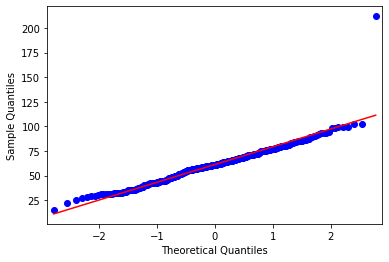

In [39]:
qqplot(df.Temperature, line='s')
plt.show()

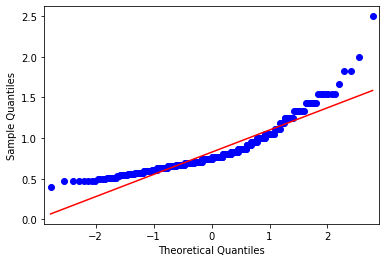

In [40]:
qqplot(df.Rainfall, line='s')
plt.show()

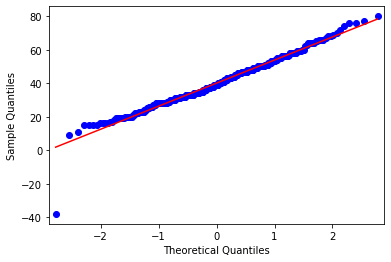

In [41]:
qqplot(df.Flyers, line='s')
plt.show()

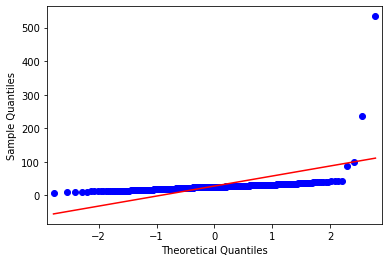

In [42]:
qqplot(df.Sales, line='s')
plt.show()

In [71]:
#Anderson-Darling
result = anderson(df.Sales)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.954
15.000: 0.570, data does not look normal (reject H0)
10.000: 0.649, data does not look normal (reject H0)
5.000: 0.779, data does not look normal (reject H0)
2.500: 0.908, data does not look normal (reject H0)
1.000: 1.080, data looks normal (fail to reject H0)


In [72]:
#Shapiro Wilks
stat, p = shapiro(df.Sales)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.992, p=0.036
Sample does not look Gaussian


In [45]:
#Anderson-Darling
result = anderson(df.Rainfall)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 14.723
15.000: 0.570, data does not look normal (reject H0)
10.000: 0.649, data does not look normal (reject H0)
5.000: 0.779, data does not look normal (reject H0)
2.500: 0.908, data does not look normal (reject H0)
1.000: 1.080, data does not look normal (reject H0)


In [46]:
#Shapiro Wilks
stat, p = shapiro(df.Rainfall)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.851, p=0.000
Sample does not look Gaussian


In [47]:
#Anderson-Darling
result = anderson(df.Flyers)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.882
15.000: 0.570, data does not look normal (reject H0)
10.000: 0.649, data does not look normal (reject H0)
5.000: 0.779, data does not look normal (reject H0)
2.500: 0.908, data looks normal (fail to reject H0)
1.000: 1.080, data looks normal (fail to reject H0)


In [48]:
#Shapiro Wilks
stat, p = shapiro(df.Flyers)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.975, p=0.000
Sample does not look Gaussian


In [49]:
df["Temperature"] = df.Temperature.where(df.Temperature < 150, np.nan)

In [50]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,364.000000,365.000000,365.000000,365.0,365.000000
mean,60.810440,0.825973,40.104110,0.5,27.589041
std,16.285044,0.273890,13.786445,0.0,29.979680
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.400000,0.910000,49.000000,0.5,30.000000
max,102.900000,2.500000,80.000000,0.5,534.000000


In [51]:
df = df.assign(Temperature=df.Temperature.fillna(df.Temperature.rolling(7,min_periods=1,).median()))

In [52]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,60.774521,0.825973,40.104110,0.5,27.589041
std,16.277131,0.273890,13.786445,0.0,29.979680
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.300000,0.910000,49.000000,0.5,30.000000
max,102.900000,2.500000,80.000000,0.5,534.000000


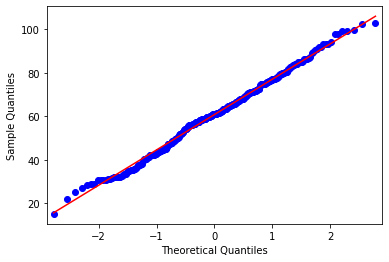

In [53]:
qqplot(df.Temperature, line='s')
plt.show()

In [54]:
#Anderson-Darling
result = anderson(df.Temperature)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.610
15.000: 0.570, data does not look normal (reject H0)
10.000: 0.649, data looks normal (fail to reject H0)
5.000: 0.779, data looks normal (fail to reject H0)
2.500: 0.908, data looks normal (fail to reject H0)
1.000: 1.080, data looks normal (fail to reject H0)


In [55]:
#Shapiro Wilks
stat, p = shapiro(df.Temperature)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.994, p=0.177
Sample looks Gaussian


In [56]:
df["Flyers"] = df.Flyers.where(df.Flyers > 0, np.nan)

In [57]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,364.000000,365.0,365.000000
mean,60.774521,0.825973,40.318681,0.5,27.589041
std,16.277131,0.273890,13.180986,0.0,29.979680
min,15.100000,0.400000,9.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.300000,0.910000,49.000000,0.5,30.000000
max,102.900000,2.500000,80.000000,0.5,534.000000


In [58]:
df = df.assign(Flyers=df.Flyers.fillna(df.Flyers.rolling(7,min_periods=1,).median()))

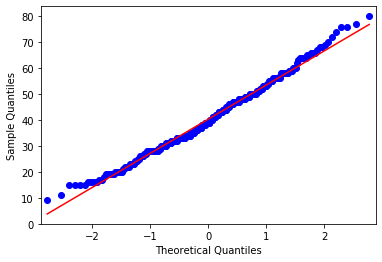

In [59]:
qqplot(df.Flyers, line='s')
plt.show()

In [69]:
#Anderson-Darling
result = anderson(df.Flyers)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.963
15.000: 0.570, data does not look normal (reject H0)
10.000: 0.649, data does not look normal (reject H0)
5.000: 0.779, data does not look normal (reject H0)
2.500: 0.908, data does not look normal (reject H0)
1.000: 1.080, data looks normal (fail to reject H0)


In [70]:
#Shapiro Wilks
stat, p = shapiro(df.Flyers)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.990, p=0.012
Sample does not look Gaussian


In [62]:
df["Sales"] = df.Sales.where(df.Sales < 80, np.nan)

In [63]:
df = df.assign(Sales=df.Sales.fillna(df.Sales.rolling(7,min_periods=1,).median()))

In [64]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,60.774521,0.825973,40.305479,0.5,25.353425
std,16.277131,0.273890,13.165284,0.0,6.939477
min,15.100000,0.400000,9.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.300000,0.910000,49.000000,0.5,30.000000
max,102.900000,2.500000,80.000000,0.5,43.000000


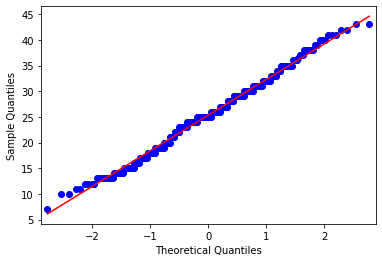

In [65]:
qqplot(df.Sales, line='s')
plt.show()

In [66]:
#Anderson-Darling
result = anderson(df.Sales)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.954
15.000: 0.570, data does not look normal (reject H0)
10.000: 0.649, data does not look normal (reject H0)
5.000: 0.779, data does not look normal (reject H0)
2.500: 0.908, data does not look normal (reject H0)
1.000: 1.080, data looks normal (fail to reject H0)


In [68]:
#Shapiro Wilks
stat, p = shapiro(df.Sales)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.992, p=0.036
Sample does not look Gaussian
